# Check Pulsar Detection

This notebook is for folding observational data of Pulsars.
It is based on `Emilie Parent` document and `Maura McLaughlin` suggestion.

**Last edit**: Angela 

**Edit message**: Added documentation and formatting

In [1]:
#cd /home/jovyan/work/shared/PSC/advancedtiming/2023/crabdata/
#cp -r 59801 ../Angela/crab/.

## 1. Import required libraries

First, let us import some libraries required to display the prepfold plots.

In [2]:
import numpy as np
import os, glob, json 
import matplotlib.pyplot as plt

In [3]:
#ls -la

## 2. Data Preparation

For each data file, do the following 2 steps:

## 2.1 run `rfifind`

Clean the data by producing a RFI mask

#### `!rfifind -time 1.0 -o filename filename.fits`

where:\
filename must be replaced for example by the name of the file before the .fits extension.\

#### some `rfifind output`

filename_rfifind.mask  which includes the mask itself\
filename_rfifind.ps´   a plot that shows the mask

In [4]:
!rfifind -time 1.0 -o crab_59682 *.fits



               Pulsar Data RFI Finder
                 by Scott M. Ransom

Assuming the data are PSRFITS format...
Reading PSRFITS data from 7 files:
  'Skynet_59682_gpt_crab_4_13_22_79148_27800_0001.fits'
  'Skynet_59682_gpt_crab_4_13_22_79148_27800_0002.fits'
  'Skynet_59682_gpt_crab_4_13_22_79148_27800_0003.fits'
  'Skynet_59682_gpt_crab_4_13_22_79148_27800_0004.fits'
  'Skynet_59682_gpt_crab_4_13_22_79148_27800_0005.fits'
  'Skynet_59682_gpt_crab_4_13_22_79148_27800_0006.fits'
  'Skynet_59682_gpt_crab_4_13_22_79148_27800_0007.fits'

    Number of files = 7
       Num of polns = 4
  Center freq (MHz) = 1550
    Num of channels = 1024
    Sample time (s) = 0.001048576   
     Spectra/subint = 32
   Total points (N) = 1717696
     Total time (s) = 1801.134800896
     Clipping sigma = 6.000
   Invert the band? = True
          Byteswap? = False
     Remove zeroDM? = False
     Apply scaling? = False
     Apply offsets? = False
     Apply weights? = True

File  Start Spec   Samples   

In [7]:
#!prepdata -dm 56.835 -mask crab_59772_rfifind.mask -o crab_59772_topo 59772/*.fits
!prepdata -nobary -dm 56.835 -mask crab_59682_rfifind.mask -o crab_topo_59682 *.fits



           Pulsar Data Preparation Routine
    Type conversion, de-dispersion, barycentering.
                 by Scott M. Ransom

Assuming the data are PSRFITS format...
Reading PSRFITS data from 7 files:
  'Skynet_59682_gpt_crab_4_13_22_79148_27800_0001.fits'
  'Skynet_59682_gpt_crab_4_13_22_79148_27800_0002.fits'
  'Skynet_59682_gpt_crab_4_13_22_79148_27800_0003.fits'
  'Skynet_59682_gpt_crab_4_13_22_79148_27800_0004.fits'
  'Skynet_59682_gpt_crab_4_13_22_79148_27800_0005.fits'
  'Skynet_59682_gpt_crab_4_13_22_79148_27800_0006.fits'
  'Skynet_59682_gpt_crab_4_13_22_79148_27800_0007.fits'

    Number of files = 7
       Num of polns = 4
  Center freq (MHz) = 1550
    Num of channels = 1024
    Sample time (s) = 0.001048576   
     Spectra/subint = 32
   Total points (N) = 1717696
     Total time (s) = 1801.134800896
     Clipping sigma = 6.000
   Invert the band? = True
          Byteswap? = False
     Remove zeroDM? = False
     Apply scaling? = False
     Apply offsets? = False
 

In [8]:
ls crab_topo_59682*

crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd
crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd.bestprof
crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd.jpg
crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd.ps
crab_topo_59682_33.80ms_Cand.pfd
crab_topo_59682_33.80ms_Cand.pfd.bestprof
crab_topo_59682_33.80ms_Cand.pfd.jpg
crab_topo_59682_33.80ms_Cand.pfd.ps
crab_topo_59682.dat
crab_topo_59682.inf
crab_topo_59682_PSR_0534+2200.pfd
crab_topo_59682_PSR_0534+2200.pfd.bestprof
crab_topo_59682_PSR_0534+2200.pfd.jpg
crab_topo_59682_PSR_0534+2200.pfd.polycos
crab_topo_59682_PSR_0534+2200.pfd.ps


## 2.2 run `prepfold`

To fold data, we run the following command:

`prepfold -par parfile.par -dm DM -mask filename_rfifind.mask -topo -nopdsearch *000*.fits`

`parfile.par` is the initial parameter file, 
and path/to/parfile.par is the directory path to the parfile.par (so that prepfold can locate the parfile.par).
It contains information on the pulsar, including the `spin frequency` that prepfold needs to know to fold the data at the pulsar’s `period`. 

This command runs prepfold using the parfile.par and DM for all fits files in the directory. To create the par_file and check the DM of a pulsar, one can look at the ATNF catalog (https://www.atnf.csiro.au/research/pulsar/psrcat/). 

In [9]:
#!prepfold -par ../B0531.par -dm 56.77118 -mask Skynet_59806_gpt_crab_8_15_22_82760_31541_rfifind.mask -topo -nopdsearch *000*.fits 
!prepfold -par ../B0531.par -dm 56.77118 -mask crab_59682_rfifind.mask -nopdsearch crab_topo_59682.dat 



#!prepdata -dm 56.835 -mask crab_59772_rfifind.mask -o crab_59772_topo 59772/*.fits
#!prepfold -par B0531.par -dm 56.77118 -mask crab_59772_rfifind.mask -topo -nosearch  crab_59772_topo.dat




        Pulsar Raw-Data Folding Search Routine
 Used for DM, Period, and P-dot tweaking of PSR candidates.
                 by Scott M. Ransom

Assuming the data are PRESTO time series of floats format...
Reading input data from 'crab_topo_59682.dat'.
Reading information from 'crab_topo_59682.inf'.

  readpar:  Warning!  'F3' is currently unused!
Folding a PSR_0534+2200 candidate.

Output data file is 'crab_topo_59682_PSR_0534+2200.pfd'.
Output plot file is 'crab_topo_59682_PSR_0534+2200.pfd.ps'.
Best profile is in  'crab_topo_59682_PSR_0534+2200.pfd.bestprof'.
  readpar:  Warning!  'F3' is currently unused!
Generating polycos for PSR 0534+2200.
Polycos used are in 'crab_topo_59682_PSR_0534+2200.pfd.polycos'.

Read 25 set(s) of polycos for PSR 0534+2200 at 59683.032013888886
Overriding polyco DM = 56.771180 with 56.771180

Pulsar                       =  0534+2200
Folding (topo) epoch  (MJD)  =  59683.032013888886
Data pt duration (dt)   (s)  =  0.001048576
Total number of data point

In [10]:
ls *.ps *.pfd

59682_0001_rfifind.ps
59682_0001_topo_PSR_0534+2200.pfd
59682_0001_topo_PSR_0534+2200.pfd.ps
59682_0002_rfifind.ps
59682_0002_topo_PSR_0534+2200.pfd
59682_0002_topo_PSR_0534+2200.pfd.ps
59682_0003_rfifind.ps
59682_0003_topo_PSR_0534+2200.pfd
59682_0003_topo_PSR_0534+2200.pfd.ps
59682_0004_rfifind.ps
59682_0004_topo_PSR_0534+2200.pfd
59682_0004_topo_PSR_0534+2200.pfd.ps
59682_0005_rfifind.ps
59682_0005_topo_PSR_0534+2200.pfd
59682_0005_topo_PSR_0534+2200.pfd.ps
59682_0006_rfifind.ps
59682_0006_topo_PSR_0534+2200.pfd
59682_0006_topo_PSR_0534+2200.pfd.ps
59682_0007_rfifind.ps
59682_0007_topo_PSR_0534+2200.pfd
59682_0007_topo_PSR_0534+2200.pfd.ps
59682_rfifind.ps
59682_topo_PSR_0534+2200.pfd
59682_topo_PSR_0534+2200.pfd.ps
crab_59682_rfifind.ps
crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd
crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd.ps
crab_topo_59682_33.80ms_Cand.pfd
crab_topo_59682_33.80ms_Cand.pfd.ps
crab_topo_59682_PSR_0534+2200.pfd
crab_topo_59682_PSR_0534+2200.pfd.ps
Skynet_59682_gpt_cra

In [11]:
!~/work/shared/PSC/advancedtiming/2023/get_TOAs.py -t crab_topo_59682_PSR_0534+2200.pfd.ps -n 8 crab_topo_59682_PSR_0534+2200.pfd

Read 72 polycos for PSR 0534+2200
Error: 'crab_topo_59682_PSR_0534+2200.pfd' was made allowing prepfold to search!


## 3. Display image

Now we use `Ipython` to display the plot generated. The command below converts the .ps file into a .jpg file, which can then be viewed using the ipython display.

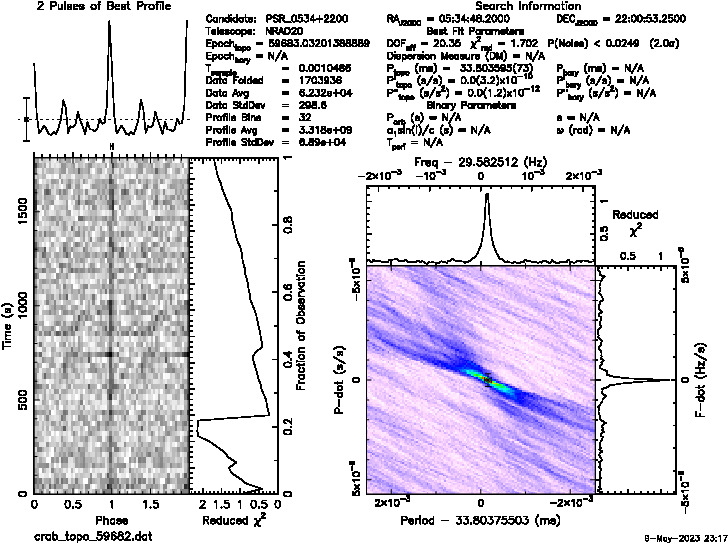

In [12]:
from IPython.display import display, Image
!convert -rotate 90 crab_topo_59682_PSR_0534+2200.pfd.ps crab_topo_59682_PSR_0534+2200.pfd.jpg
Image(filename='./crab_topo_59682_PSR_0534+2200.pfd.jpg')

In [13]:
ls *bestprof*

59682_0001_topo_PSR_0534+2200.pfd.bestprof
59682_0002_topo_PSR_0534+2200.pfd.bestprof
59682_0003_topo_PSR_0534+2200.pfd.bestprof
59682_0004_topo_PSR_0534+2200.pfd.bestprof
59682_0005_topo_PSR_0534+2200.pfd.bestprof
59682_0006_topo_PSR_0534+2200.pfd.bestprof
59682_0007_topo_PSR_0534+2200.pfd.bestprof
59682_topo_PSR_0534+2200.pfd.bestprof
crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd.bestprof
crab_topo_59682_33.80ms_Cand.pfd.bestprof
crab_topo_59682_PSR_0534+2200.pfd.bestprof
Skynet_59682_gpt_crab_4_13_22_79148_27800_0001_33.39ms_Cand.pfd.bestprof
Skynet_59682_gpt_crab_4_13_22_79148_27800_0001_PSR_0531+21.pfd.bestprof*
Skynet_59682_gpt_crab_4_13_22_79148_27800_0002_33.39ms_Cand.pfd.bestprof
Skynet_59682_gpt_crab_4_13_22_79148_27800_0003_33.39ms_Cand.pfd.bestprof
Skynet_59682_gpt_crab_4_13_22_79148_27800_0004_33.39ms_Cand.pfd.bestprof


In [14]:
!prepfold -p 0.0338022752477932 -dm 56.77118 -mask crab_59682_rfifind.mask -nopdsearch crab_topo_59682.dat



        Pulsar Raw-Data Folding Search Routine
 Used for DM, Period, and P-dot tweaking of PSR candidates.
                 by Scott M. Ransom

Assuming the data are PRESTO time series of floats format...
Reading input data from 'crab_topo_59682.dat'.
Reading information from 'crab_topo_59682.inf'.

Folding a 33.80ms_Cand candidate.

Output data file is 'crab_topo_59682_33.80ms_Cand.pfd'.
Output plot file is 'crab_topo_59682_33.80ms_Cand.pfd.ps'.
Best profile is in  'crab_topo_59682_33.80ms_Cand.pfd.bestprof'.

Folding (topo) epoch  (MJD)  =  59683.032013888886
Data pt duration (dt)   (s)  =  0.001048576
Total number of data points  =  1703936
Number of profile bins       =  32
Folding period          (s)  =  0.0338022752477932
Folding frequency      (hz)  =  29.5838073819

Starting work on 'crab_topo_59682.dat'...

  Folded 1703936 points of 1703936

Optimizing...

  Searching 129 periods, and 1 p-dots...
     (129 total trials)
  Amount Complete = 12900%  Done searching.

Maximum r

In [15]:
ls *.ps

59682_0001_rfifind.ps
59682_0001_topo_PSR_0534+2200.pfd.ps
59682_0002_rfifind.ps
59682_0002_topo_PSR_0534+2200.pfd.ps
59682_0003_rfifind.ps
59682_0003_topo_PSR_0534+2200.pfd.ps
59682_0004_rfifind.ps
59682_0004_topo_PSR_0534+2200.pfd.ps
59682_0005_rfifind.ps
59682_0005_topo_PSR_0534+2200.pfd.ps
59682_0006_rfifind.ps
59682_0006_topo_PSR_0534+2200.pfd.ps
59682_0007_rfifind.ps
59682_0007_topo_PSR_0534+2200.pfd.ps
59682_rfifind.ps
59682_topo_PSR_0534+2200.pfd.ps
crab_59682_rfifind.ps
crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd.ps
crab_topo_59682_33.80ms_Cand.pfd.ps
crab_topo_59682_PSR_0534+2200.pfd.ps
Skynet_59682_gpt_crab_4_13_22_79148_27800_0001_33.39ms_Cand.pfd.ps
Skynet_59682_gpt_crab_4_13_22_79148_27800_0001_PSR_0531+21.pfd.ps*
Skynet_59682_gpt_crab_4_13_22_79148_27800_0002_33.39ms_Cand.pfd.ps
Skynet_59682_gpt_crab_4_13_22_79148_27800_0003_33.39ms_Cand.pfd.ps
Skynet_59682_gpt_crab_4_13_22_79148_27800_0004_33.39ms_Cand.pfd.ps


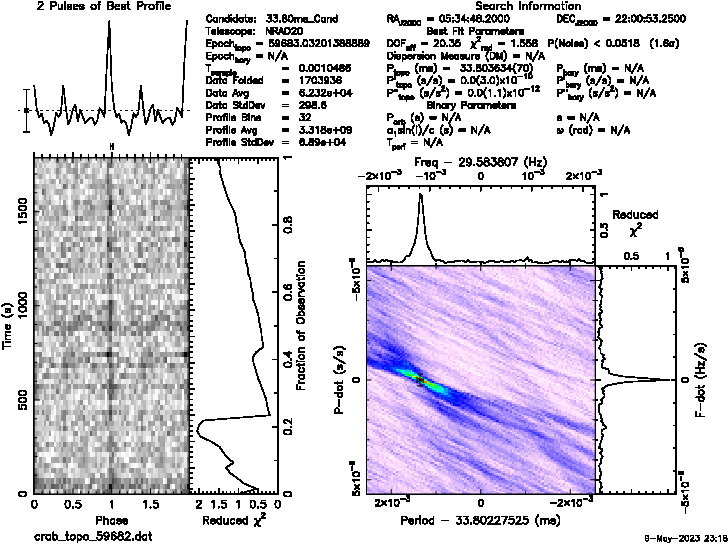

In [16]:
from IPython.display import display, Image
!convert -rotate 90 crab_topo_59682_33.80ms_Cand.pfd.ps crab_topo_59682_33.80ms_Cand.pfd.jpg
Image(filename='./crab_topo_59682_33.80ms_Cand.pfd.jpg')

In [28]:
!prepfold -p 0.0338022752477932 -dm 56.77118 -mask crab_59682_rfifind.mask -start 0.4 crab_topo_59682.dat



        Pulsar Raw-Data Folding Search Routine
 Used for DM, Period, and P-dot tweaking of PSR candidates.
                 by Scott M. Ransom

Assuming the data are PRESTO time series of floats format...
Reading input data from 'crab_topo_59682.dat'.
Reading information from 'crab_topo_59682.inf'.

Folding a 33.80ms_Cand candidate.

Output data file is 'crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd'.
Output plot file is 'crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd.ps'.
Best profile is in  'crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd.bestprof'.

Folding (topo) epoch  (MJD)  =  59683.040402496888
Data pt duration (dt)   (s)  =  0.001048576
Total number of data points  =  983040
Number of profile bins       =  32
Folding period          (s)  =  0.0338022752477932
Folding frequency      (hz)  =  29.5838073819

Starting work on 'crab_topo_59682.dat'...

  Folded 983040 points of 983040

Optimizing...

  Searching 129 periods, and 129 p-dots...
     (16641 total trials)
  Amount Complete = 100

In [18]:
ls *.ps

59682_0001_rfifind.ps
59682_0001_topo_PSR_0534+2200.pfd.ps
59682_0002_rfifind.ps
59682_0002_topo_PSR_0534+2200.pfd.ps
59682_0003_rfifind.ps
59682_0003_topo_PSR_0534+2200.pfd.ps
59682_0004_rfifind.ps
59682_0004_topo_PSR_0534+2200.pfd.ps
59682_0005_rfifind.ps
59682_0005_topo_PSR_0534+2200.pfd.ps
59682_0006_rfifind.ps
59682_0006_topo_PSR_0534+2200.pfd.ps
59682_0007_rfifind.ps
59682_0007_topo_PSR_0534+2200.pfd.ps
59682_rfifind.ps
59682_topo_PSR_0534+2200.pfd.ps
crab_59682_rfifind.ps
crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd.ps
crab_topo_59682_33.80ms_Cand.pfd.ps
crab_topo_59682_PSR_0534+2200.pfd.ps
Skynet_59682_gpt_crab_4_13_22_79148_27800_0001_33.39ms_Cand.pfd.ps
Skynet_59682_gpt_crab_4_13_22_79148_27800_0001_PSR_0531+21.pfd.ps*
Skynet_59682_gpt_crab_4_13_22_79148_27800_0002_33.39ms_Cand.pfd.ps
Skynet_59682_gpt_crab_4_13_22_79148_27800_0003_33.39ms_Cand.pfd.ps
Skynet_59682_gpt_crab_4_13_22_79148_27800_0004_33.39ms_Cand.pfd.ps


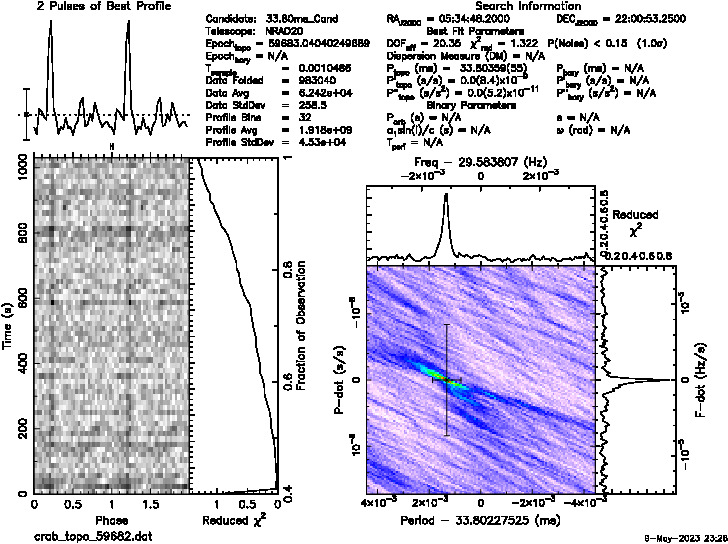

In [29]:
from IPython.display import display, Image
!convert -rotate 90 crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd.ps crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd.jpg
Image(filename='./crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd.jpg')

In [30]:
!prepfold -p 0.03380359 -dm 56.77118 -mask crab_59682_rfifind.mask -start 0.4 -nosearch crab_topo_59682.dat
#!prepfold -h



        Pulsar Raw-Data Folding Search Routine
 Used for DM, Period, and P-dot tweaking of PSR candidates.
                 by Scott M. Ransom

Assuming the data are PRESTO time series of floats format...
Reading input data from 'crab_topo_59682.dat'.
Reading information from 'crab_topo_59682.inf'.

Folding a 33.80ms_Cand candidate.

Output data file is 'crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd'.
Output plot file is 'crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd.ps'.
Best profile is in  'crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd.bestprof'.

Folding (topo) epoch  (MJD)  =  59683.040402496888
Data pt duration (dt)   (s)  =  0.001048576
Total number of data points  =  983040
Number of profile bins       =  32
Folding period          (s)  =  0.03380359
Folding frequency      (hz)  =  29.5826567533

Starting work on 'crab_topo_59682.dat'...

  Folded 983040 points of 983040

Optimizing...

  Searching 1 periods, and 1 p-dots...
     (1 total trials)
  Amount Complete = 1664100%  Done sear

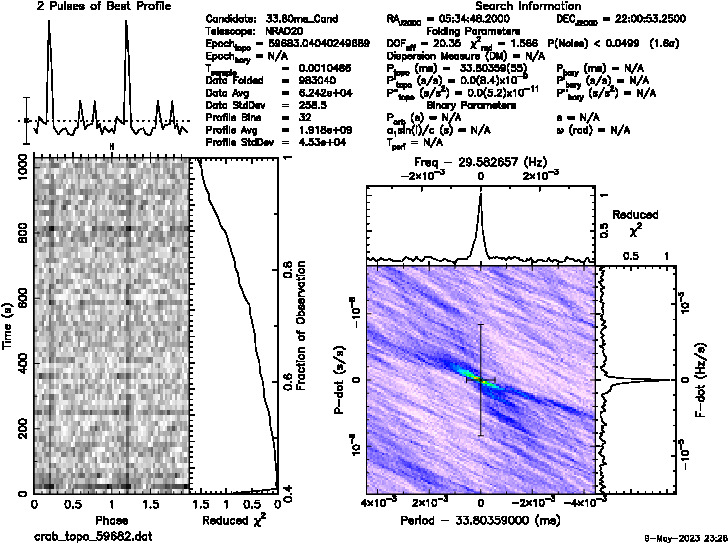

In [31]:
from IPython.display import display, Image
!convert -rotate 90 crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd.ps crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd.jpg
Image(filename='./crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd.jpg')

In [32]:
# APPENDING: after the first use of naming a .tim file (using one ">"), use ">> filename.tim" to append your TOAs to the file instead of overwriting it every time
#get TOAs.py -t template.pfd.bestprof -n N filename.pfd
#!~/work/shared/PSC/advancedtiming/2023/Angela/crab/59806/

!~/work/shared/PSC/advancedtiming/2023/get_TOAs.py -t crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd.bestprof -n 8 crab_topo_59682_0.40-1.00_33.80ms_Cand.pfd
#!~/work/shared/PSC/advancedtiming/2023/get_TOAs.py -t crab_topo_0.40-1.00_33.80ms_Cand.pfd.bestprof -n 8 crab_topo_0.40-1.00_33.80ms_Cand.pfd >> crabTOAsMae.tim

j               1550.244 59683.0411477817273   122.28
j               1550.244 59683.0426392122311   130.61
j               1550.244 59683.0441306412547   134.04
j               1550.244 59683.0456216785713   143.91
j               1550.244 59683.0471131042999   126.19
j               1550.244 59683.0486045319113   119.62
j               1550.244 59683.0500959588417   146.25
j               1550.244 59683.0515869976890   210.36
